**Import Libraries**

In [62]:
# importing all mu libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Read the data**

In [63]:
x=pd.read_csv('/content/drive/MyDrive/Datasets/US_youtube_trending_data.csv')

In [64]:
y=pd.read_json('/content/drive/MyDrive/Datasets/US_category_id.json')

**Data Cleaning and Preprocessing**

In [65]:
x.drop(['thumbnail_link','tags','description'],axis=1,inplace=True)

In [66]:
x.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
dtype: int64

In [67]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199190 entries, 0 to 199189
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           199190 non-null  object
 1   title              199190 non-null  object
 2   publishedAt        199190 non-null  object
 3   channelId          199190 non-null  object
 4   channelTitle       199190 non-null  object
 5   categoryId         199190 non-null  int64 
 6   trending_date      199190 non-null  object
 7   view_count         199190 non-null  int64 
 8   likes              199190 non-null  int64 
 9   dislikes           199190 non-null  int64 
 10  comment_count      199190 non-null  int64 
 11  comments_disabled  199190 non-null  bool  
 12  ratings_disabled   199190 non-null  bool  
dtypes: bool(2), int64(5), object(6)
memory usage: 17.1+ MB


In [68]:
x['publishedAt']=pd.to_datetime(x['publishedAt'])

In [69]:
x['trending_date']=pd.to_datetime(x['trending_date'])

In [70]:
x['publishedAt'].dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
199185    2023
199186    2023
199187    2023
199188    2023
199189    2023
Name: publishedAt, Length: 199190, dtype: int64

In [71]:
x['published_year'] = x['publishedAt'].dt.year

In [72]:
x['published_month'] = x['publishedAt'].dt.month_name()

In [73]:
# created new columns
x['trending_year'] = x['trending_date'].dt.year
x['trending_month'] = x['trending_date'].dt.month_name()

In [74]:
y

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [75]:
y['items']

0     {'kind': 'youtube#videoCategory', 'etag': 'IfW...
1     {'kind': 'youtube#videoCategory', 'etag': '5XG...
2     {'kind': 'youtube#videoCategory', 'etag': 'HCj...
3     {'kind': 'youtube#videoCategory', 'etag': 'ra8...
4     {'kind': 'youtube#videoCategory', 'etag': '7mq...
5     {'kind': 'youtube#videoCategory', 'etag': '0Z6...
6     {'kind': 'youtube#videoCategory', 'etag': 'K_-...
7     {'kind': 'youtube#videoCategory', 'etag': 'I3I...
8     {'kind': 'youtube#videoCategory', 'etag': 'D1W...
9     {'kind': 'youtube#videoCategory', 'etag': 'QME...
10    {'kind': 'youtube#videoCategory', 'etag': 'v2n...
11    {'kind': 'youtube#videoCategory', 'etag': 'Qi1...
12    {'kind': 'youtube#videoCategory', 'etag': 'IbG...
13    {'kind': 'youtube#videoCategory', 'etag': 'gYz...
14    {'kind': 'youtube#videoCategory', 'etag': 'hHU...
15    {'kind': 'youtube#videoCategory', 'etag': 'KEd...
16    {'kind': 'youtube#videoCategory', 'etag': 'Aio...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [76]:
y['items'][0]['snippet']['title']

'Film & Animation'

In [77]:
x['categoryId'].unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29])

In [78]:
y['items'][2]['id']

'10'

In [79]:
id=[y['items'][i]['id']  for i in range(0,32)  ]
id

['1',
 '2',
 '10',
 '15',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44']

In [80]:
y['items'][0]['snippet']['title']

'Film & Animation'

In [81]:
title=[y['items'][i]['snippet']['title'] for i in range(0,32)]
title

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

In [82]:
Id_Title=pd.DataFrame({"categoryId":id,"Title":title})

In [83]:
Id_Title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryId  32 non-null     object
 1   Title       32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [84]:
Id_Title['categoryId']=pd.to_numeric(Id_Title['categoryId'])

In [85]:
Id_Title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryId  32 non-null     int64 
 1   Title       32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [86]:
Id_Title.rename(columns={'Title':'Genre'}, inplace=True)

In [87]:
data = pd.merge(x,Id_Title,how="inner",on="categoryId")

In [88]:
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month,Genre
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,False,False,2020,August,2020,August,People & Blogs
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11 20:24:34+00:00,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12 00:00:00+00:00,940036,87111,1860,7052,False,False,2020,August,2020,August,People & Blogs
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11 17:00:31+00:00,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12 00:00:00+00:00,591837,44168,409,2652,False,False,2020,August,2020,August,People & Blogs
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11 22:00:05+00:00,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12 00:00:00+00:00,105955,4511,69,673,False,False,2020,August,2020,August,People & Blogs
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11 23:00:06+00:00,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12 00:00:00+00:00,277338,37533,197,3666,False,False,2020,August,2020,August,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-26 00:00:00+00:00,5993854,70282,0,19460,False,False,2022,April,2022,April,Nonprofits & Activism
199186,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-27 00:00:00+00:00,6003393,70402,0,19470,False,False,2022,April,2022,April,Nonprofits & Activism
199187,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-29 00:00:00+00:00,6017799,70619,0,19474,False,False,2022,April,2022,April,Nonprofits & Activism
199188,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-30 00:00:00+00:00,6023847,70704,0,19467,False,False,2022,April,2022,April,Nonprofits & Activism


In [89]:
data[data['video_id']=='3C66w5Z0ixs']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month,Genre
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,False,False,2020,August,2020,August,People & Blogs
22,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13 00:00:00+00:00,3017834,183592,9506,41374,False,False,2020,August,2020,August,People & Blogs
46,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14 00:00:00+00:00,3721729,195344,10648,44555,False,False,2020,August,2020,August,People & Blogs
69,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15 00:00:00+00:00,3853404,200215,10904,45461,False,False,2020,August,2020,August,People & Blogs
95,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16 00:00:00+00:00,3898795,201808,10975,45574,False,False,2020,August,2020,August,People & Blogs
122,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-17 00:00:00+00:00,3929527,203054,11026,45488,False,False,2020,August,2020,August,People & Blogs
145,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-18 00:00:00+00:00,3958226,204260,11070,45134,False,False,2020,August,2020,August,People & Blogs


In [90]:
gt= data.groupby('video_id')

In [91]:
# video dataframe is data after grouped by video_id
video = gt.max()
video

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month,Genre
video_id,,,,,,,,,,,,,,,,,
--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,6823249,262692,4107,16445,False,False,2021,June,2021,June,Music
--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15 00:00:00+00:00,538485,17290,0,1439,False,False,2022,March,2022,March,Entertainment
--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20 01:03:32+00:00,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-25 00:00:00+00:00,682609,8029,369,723,False,False,2021,September,2021,September,Entertainment
--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26 00:00:00+00:00,1280997,14603,0,2078,False,False,2022,December,2022,December,Sports
--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11 00:00:00+00:00,623949,29991,320,998,False,False,2021,December,2021,December,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzCrFWjKPy8,Season 1 Episode 3 Preview | House of the Drag...,2022-08-29 02:00:10+00:00,UCQzdMyuz0Lf4zo4uGcEujFw,GameofThrones,22,2022-09-03 00:00:00+00:00,2603821,47431,0,3586,False,False,2022,August,2022,September,People & Blogs
zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,2021-02-12 05:03:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,10,2021-02-21 00:00:00+00:00,13974461,728439,7579,57012,False,False,2021,February,2021,February,Music
zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,2021-01-16 05:39:05+00:00,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2021-01-18 00:00:00+00:00,2598512,20024,989,2872,False,False,2021,January,2021,January,Sports


**Exploratory Data Analysis**

In [92]:
# count of Videos published in each year.
pyear= video.groupby('published_year')
pyear.count()

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_month,trending_year,trending_month,Genre
published_year,,,,,,,,,,,,,,,,
2020,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276
2021,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969,12969
2022,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918,13918
2023,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116


In [93]:
# grouped by sports genre where clause
a=video[video['Genre']=='Sports']
a

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month,Genre
video_id,,,,,,,,,,,,,,,,,
--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26 00:00:00+00:00,1280997,14603,0,2078,False,False,2022,December,2022,December,Sports
-0Yxqcm0K2I,Colby Covington and Tyron Woodley finally face...,2020-09-18 18:18:36+00:00,UC789h3eqw0H1HqGmIsI26OA,TheMacLife,17,2020-09-21 00:00:00+00:00,600500,8333,233,6361,False,False,2020,September,2020,September,Sports
-1AAhZwrS3U,GOLDBRIDGE! Manchester City 6-3 Manchester Uni...,2022-10-02 15:41:05+00:00,UCMmVPVb0BwSIOWVeDwlPocQ,The United Stand,17,2022-10-07 00:00:00+00:00,467146,11544,0,1272,False,False,2022,October,2022,October,Sports
-4fSxhT1lqo,ROLLY ROMERO IMMEDIATE REACTION AFTER KNOCKOUT...,2022-05-29 05:51:15+00:00,UCmxZw7N4Jyljr1RbSs4Ymaw,FightHype.com,17,2022-06-03 00:00:00+00:00,935010,9267,0,7104,False,False,2022,May,2022,May,Sports
-6FtgyUCDlw,"Farewell and Thank You, Diamondback Bicycles",2022-07-02 11:36:31+00:00,UCu8YylsPiu9XfaQC74Hr_Gw,Berm Peak,17,2022-07-08 00:00:00+00:00,642141,30603,0,1747,False,False,2022,July,2022,July,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwv5Xm93egM,"🎥 LEO MESSI, DAY 1! 🔴🔵 #PSGxMESSI",2021-08-11 00:02:07+00:00,UCt9a_qP9CqHCNwilf-iULag,PSG - Paris Saint-Germain,17,2021-08-17 00:00:00+00:00,20444826,777272,17194,25035,False,False,2021,August,2021,August,Sports
zxONb4GHoYE,Dana White sends HEATED message after UFC 266 ...,2021-09-26 13:45:19+00:00,UCmHxiBMV67cf3GqSlf2G3Bw,TheBestofMMA,17,2021-09-30 00:00:00+00:00,159392,950,257,519,False,False,2021,September,2021,September,Sports
zySnbz5vdCg,Cristiano Ronaldo scores TWICE as Portugal bea...,2021-06-15 18:14:26+00:00,UC6c1z7bA__85CIWZ_jpCK-Q,ESPN FC,17,2021-06-22 00:00:00+00:00,1100183,11530,291,2096,False,False,2021,June,2021,June,Sports


In [94]:
# now group by channeltitle
b=a.groupby('channelTitle')
b.sum().sort_values(by = 'view_count', ascending=False)

<ipython-input-94-45358c3aef11>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b.sum().sort_values(by = 'view_count', ascending=False)


,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,trending_year
channelTitle,,,,,,,,,
NFL,5593,874000181,13768491,196900,1811375,0,3,665000,665009
NBA,5576,728587293,7831993,147444,1294850,0,0,663012,663020
Dude Perfect,1122,575470608,22735313,256533,1141029,0,0,133403,133405
FORMULA 1,1088,298614499,6494504,82871,419768,0,3,129384,129384
That's Amazing Shorts,119,198110470,13543924,278058,53704,0,1,14147,14147
...,...,...,...,...,...,...,...,...,...
Yung Mustard,17,95221,2627,89,904,0,0,2020,2020
Fox League,17,90446,973,0,100,0,0,2022,2022
Ariel Helwani,17,78031,4100,161,1074,0,0,2021,2021


In [95]:
# .agg for customized aggregate functions. we will pass in dictionary format. for column wise aggregations we use .agg function.
tr=video.groupby(by='Genre')
tr.agg({'view_count':['min','max','mean'],'likes':['min','max','mean']})

view_count                          likes            \
                             min        max          mean   min       max   
Genre                                                                       
Autos & Vehicles          143542   35708883  1.132054e+06     0   1368171   
Comedy                    100808   87284105  1.849994e+06     0   2983485   
Education                      0  149615603  2.088811e+06     0   7940311   
Entertainment                  0  206202284  3.029851e+06     0  10926910   
Film & Animation               0   86415224  2.717626e+06     0   5676872   
Gaming                     81296   73728043  1.851864e+06     0   7676226   
Howto & Style              61835   89075984  1.541478e+06     0   3482032   
Music                          0  277791741  5.008877e+06     0  16021534   
News & Politics            49692   98202265  1.536253e+06     0   1443032   
Nonprofits & Activism     354993    6045361  2.145072e+06  7905    655398   
People & Blogs                 0   97611742  1.982717e+06     0   5627368   
Pets & Animals             80634    9094409  1.510507e+06     0    458926   
Science & Technology       43472   77745621  2.922652e+06     0   1733986   
Sports                     46133  113116792  1.724654e+06     0   7174425   
Travel & Events           168987   22912715  1.274319e+06  1641    986055   

                                      
                                mean  
Genre                                 
Autos & Vehicles        47209.498580  
Comedy                 127733.018539  
Education              109287.505288  
Entertainment          139888.259603  
Film & Animation       104632.328261  
Gaming                  92056.993727  
Howto & Style           74066.482795  
Music                  282388.251886  
News & Politics         20903.378979  
Nonprofits & Activism  173198.166667  
People & Blogs         107503.422416  
Pets & Animals          63156.636943  
Science & Technology   106445.480329  
Sports                  38419.493295  
Travel & Events         65366.555556

In [96]:
# data of sports category
a=video[video['Genre']=='Sports']
a

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month,Genre
video_id,,,,,,,,,,,,,,,,,
--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26 00:00:00+00:00,1280997,14603,0,2078,False,False,2022,December,2022,December,Sports
-0Yxqcm0K2I,Colby Covington and Tyron Woodley finally face...,2020-09-18 18:18:36+00:00,UC789h3eqw0H1HqGmIsI26OA,TheMacLife,17,2020-09-21 00:00:00+00:00,600500,8333,233,6361,False,False,2020,September,2020,September,Sports
-1AAhZwrS3U,GOLDBRIDGE! Manchester City 6-3 Manchester Uni...,2022-10-02 15:41:05+00:00,UCMmVPVb0BwSIOWVeDwlPocQ,The United Stand,17,2022-10-07 00:00:00+00:00,467146,11544,0,1272,False,False,2022,October,2022,October,Sports
-4fSxhT1lqo,ROLLY ROMERO IMMEDIATE REACTION AFTER KNOCKOUT...,2022-05-29 05:51:15+00:00,UCmxZw7N4Jyljr1RbSs4Ymaw,FightHype.com,17,2022-06-03 00:00:00+00:00,935010,9267,0,7104,False,False,2022,May,2022,May,Sports
-6FtgyUCDlw,"Farewell and Thank You, Diamondback Bicycles",2022-07-02 11:36:31+00:00,UCu8YylsPiu9XfaQC74Hr_Gw,Berm Peak,17,2022-07-08 00:00:00+00:00,642141,30603,0,1747,False,False,2022,July,2022,July,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwv5Xm93egM,"🎥 LEO MESSI, DAY 1! 🔴🔵 #PSGxMESSI",2021-08-11 00:02:07+00:00,UCt9a_qP9CqHCNwilf-iULag,PSG - Paris Saint-Germain,17,2021-08-17 00:00:00+00:00,20444826,777272,17194,25035,False,False,2021,August,2021,August,Sports
zxONb4GHoYE,Dana White sends HEATED message after UFC 266 ...,2021-09-26 13:45:19+00:00,UCmHxiBMV67cf3GqSlf2G3Bw,TheBestofMMA,17,2021-09-30 00:00:00+00:00,159392,950,257,519,False,False,2021,September,2021,September,Sports
zySnbz5vdCg,Cristiano Ronaldo scores TWICE as Portugal bea...,2021-06-15 18:14:26+00:00,UC6c1z7bA__85CIWZ_jpCK-Q,ESPN FC,17,2021-06-22 00:00:00+00:00,1100183,11530,291,2096,False,False,2021,June,2021,June,Sports


In [97]:
# a is datframe where data is filtered by sports category.
x=a.groupby(by='channelTitle')

In [98]:
# get minimum and maximu likes for channel and view_count.
x.agg({'view_count':['min','max'],'likes':['min','max']})

view_count            likes        
                           min      max     min     max
channelTitle                                           
10 News First           538156   538156    6190    6190
2HYPE                   496816  1659017   26601  101737
A.M. Hoops              419922   419922    9119    9119
ACC Digital Network     196738   364653    1486    4798
AFC Asian Cup          2808250  2808250   32735   32735
...                        ...      ...     ...     ...
nbagleague             2068252  2068252   18626   18626
nick briz               232198   914567    9432   45012
nikeskateboarding      1013994  1013994   36734   36734
pandasakha             2510182  2510182  121588  121588
talkSPORT               711776   711776    7544    7544

[573 rows x 4 columns]

In [99]:
# using lambda for customized calculations columnwise.
x.agg({'view_count':lambda g:round(sum([i/100 for i in g ])/len([i/100 for i in g ]),2)})

,view_count
channelTitle,
10 News First,5381.56
2HYPE,10190.62
A.M. Hoops,4199.22
ACC Digital Network,2806.95
AFC Asian Cup,28082.50
...,...
nbagleague,20682.52
nick briz,4914.40
nikeskateboarding,10139.94


In [100]:
video=video.reset_index()

<Axes: xlabel='view_count', ylabel='Genre'>

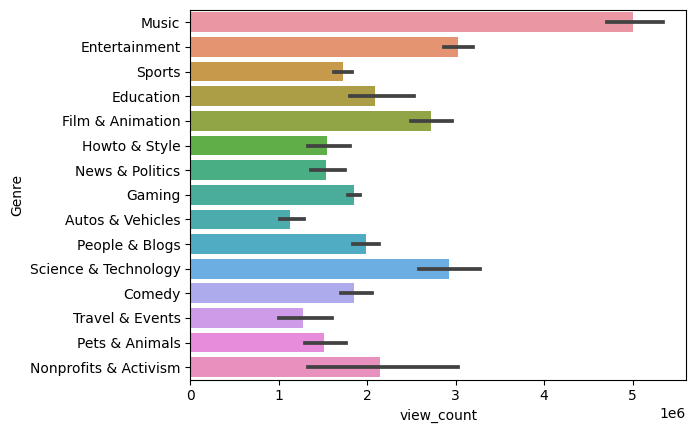

In [101]:
# From here we will analysis by graphs.
sns.barplot(y='Genre',x='view_count',data=video,estimator='mean')

In [102]:
# top 5 channels in music category
music=video[video['Genre']=='Music']

In [103]:
g= music.groupby('channelTitle')
music1= g.sum().sort_values('view_count',ascending=False).head()
music1

<ipython-input-103-96de31373332>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  music1= g.sum().sort_values('view_count',ascending=False).head()


,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,trending_year
channelTitle,,,,,,,,,
BLACKPINK,540,1904021260,148039839,1919702,20181154,0,0,109141,109141
HYBE LABELS,580,1490310158,140341397,538641,24429894,0,0,117265,117265
SMTOWN,660,1369848949,68480544,742517,12539172,0,1,133407,133408
JYP Entertainment,670,1333790001,63455214,609057,11200059,0,0,135440,135441
BANGTANTV,650,727648334,114193647,460720,4955630,0,0,131382,131384


<Axes: xlabel='view_count', ylabel='channelTitle'>

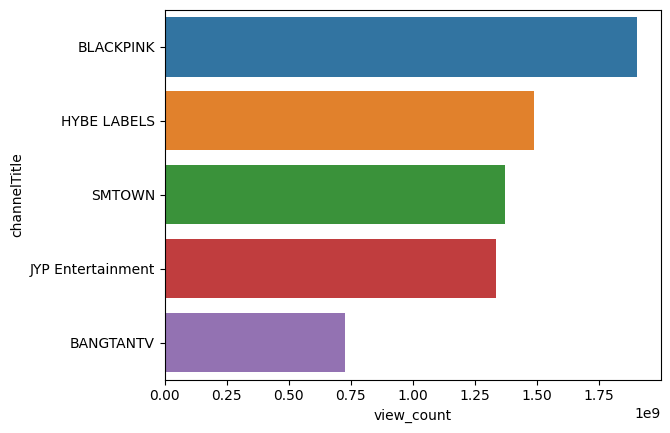

In [104]:
# Graph for top channels in music category.
sns.barplot(x='view_count',y=music1.index,data=music1,estimator='sum')

<Axes: xlabel='view_count', ylabel='channelTitle'>

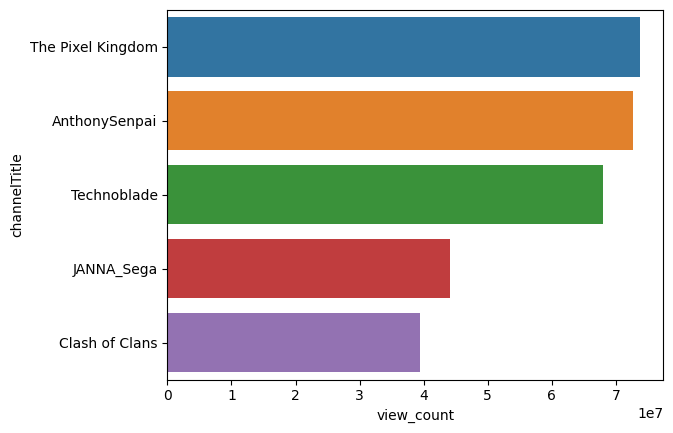

In [105]:
# top channels in gaming category based on maximum views
gaming = video[video['Genre']=='Gaming']
p=gaming.groupby('channelTitle')
gaming1=p.max().sort_values('view_count',ascending=False).head()
sns.barplot(x='view_count',y=gaming1.index,data=gaming1)

In [106]:
# To get top channels on genre based.
def mytop(gen):
  x = video[video['Genre']==gen]
  p=x.groupby('channelTitle')
  y=p.sum().sort_values('view_count',ascending=False).head()
  sns.barplot(x='view_count',y=y.index,data=y)

<ipython-input-106-60e588375c0b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=p.sum().sort_values('view_count',ascending=False).head()


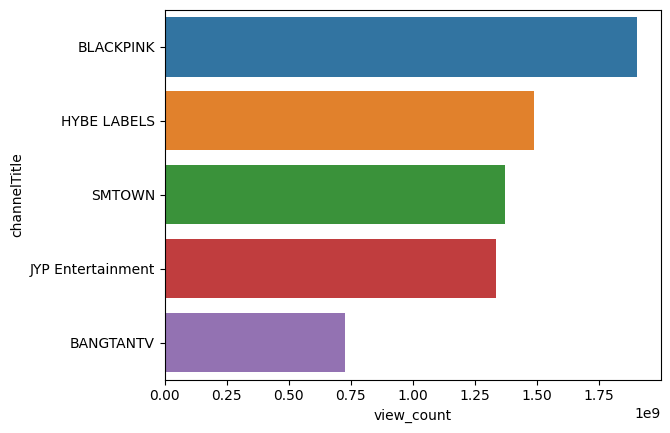

In [107]:
mytop('Music')

In [108]:
# we used widgets to create a dropdown for genre and using function we will get top channels for particular genre.
# we use widget code from official website (copy & paste from website).
c=widgets.Dropdown(
    options=video['Genre'].unique(),
    value='Music',
    description='Genre:',
    disabled=False,
)
def graph(a):
  dr = video[video['Genre']==a]
  gt=dr.groupby('channelTitle')
  y=gt.sum().sort_values('view_count',ascending=False).head()
  sns.barplot(x='view_count',y=y.index,data=y)
  plt.title(a)
  plt.xlabel('Views')
  plt.ylabel('Channel Names')
  plt.show()

# here we call the function that we have created to see the top channels for particular genre.
widgets.interact(graph,a=c)

interactive(children=(Dropdown(description='Genre:', options=('Music', 'Entertainment', 'Sports', 'Education',…

<function __main__.graph(a)>

In [109]:
# top videos for particular channel.
d=widgets.Dropdown(
    options=video['channelTitle'].unique(),
    value='NFL',
    description='channelTitle:',
    disabled=False,
)

def graph1(b):
  x=video[video['channelTitle']==b]
  q=x.sort_values('view_count',ascending=False).head()
  sns.barplot(y='title',x='view_count',data=q)
  plt.title(b)
  plt.xlabel('views')
  plt.ylabel('titles')
  plt.show()

widgets.interact(graph1,b=d)


interactive(children=(Dropdown(description='channelTitle:', index=3, options=('MigosVEVO', 'jf.okay', 'Televis…

<function __main__.graph1(b)>

In [110]:
# showing different graphs by giving options in dropdown.
x1=[4,4,4,5,5,5,5,5,8,8,8,8,8,]
x2=[10,4,2,5,2,98,98,5,6,43,1,3,9]
e=widgets.Dropdown(
    options=['Barplot','Lineplot'],
    value='Barplot',
    description='Graph',
    disabled=False,
)
def graph3(h):
  if h=='Barplot':
    sns.barplot(x=x1,y=x2)
  if h=='Lineplot':
    sns.lineplot(x=x1,y=x2)
  plt.show()

widgets.interact(graph3,h=e)


interactive(children=(Dropdown(description='Graph', options=('Barplot', 'Lineplot'), value='Barplot'), Output(…

<function __main__.graph3(h)>

In [111]:
# first select genre then select channel and then user will get top videos.
# here we created a dropdown for genre and called in a function and then we created a dropdown in function for calling channel name and then fetched top videos.
r=widgets.Dropdown(
    options=video['Genre'].unique(),
    value='Music',
    description='Genre:',
    disabled=False,
)
def genre(s):
  gen=video[video['Genre']==s]
  d=widgets.Dropdown(
    options=gen['channelTitle'].unique(),
    value=gen['channelTitle'].unique()[0],
    description='Title:',
    disabled=False,
  )
  def channel(t):
    u=video[video['channelTitle']==t]
    u=u.sort_values('view_count',ascending=False).head()
    sns.barplot(y='title',x='view_count',data=u)
    plt.title(t)
    plt.xlabel('views')
    plt.ylabel('Title')
    plt.show()
  widgets.interact(channel,t=d)
widgets.interact(genre,s=r)

interactive(children=(Dropdown(description='Genre:', options=('Music', 'Entertainment', 'Sports', 'Education',…

<function __main__.genre(s)>

In [112]:
# filtering with channel and then with video and seeing trend.
o=widgets.Dropdown(
    options=data['channelTitle'].unique(),
    value=data['channelTitle'].unique()[0],
    description='channelTitle:',
    disabled=False,
  )
def channel(j):
    v=data[data['channelTitle']==j]
    l=widgets.Dropdown(
    options=v['title'].unique(),
    value=v['title'].unique()[0],
    description='Title:',
    disabled=False,
  )
    def video(z):
      h=v[v['title']==z]
      sns.lineplot(y='trending_date',x='view_count',data=h)
      plt.title(j)
      plt.xlabel('views')
      plt.ylabel('year')
      plt.show()
    widgets.interact(video,z=l)
widgets.interact(channel,j=o)


interactive(children=(Dropdown(description='channelTitle:', options=('Brawadis', 'CaseyNeistat', 'Smosh Pit', …

<function __main__.channel(j)>

<Axes: xlabel='comment_count', ylabel='likes'>

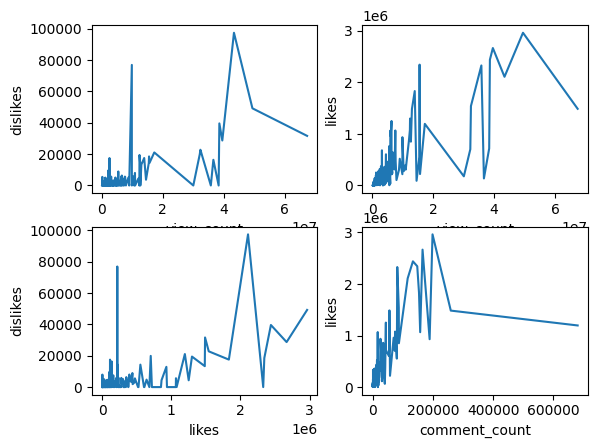

In [113]:
# subplots
abcd=video.sample(n=500)
fig,axes = plt.subplots(2,2)
sns.lineplot(x='view_count',y='likes',data=abcd,ax=axes[0,1])
sns.lineplot(x='view_count',y='dislikes',data=abcd,ax=axes[0,0])
sns.lineplot(x='likes',y='dislikes',data=abcd,ax=axes[1,0])
sns.lineplot(x='comment_count',y='likes',data=abcd,ax=axes[1,1])

In [114]:
video

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,published_year,published_month,trending_year,trending_month,Genre
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,6823249,262692,4107,16445,False,False,2021,June,2021,June,Music
1,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15 00:00:00+00:00,538485,17290,0,1439,False,False,2022,March,2022,March,Entertainment
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20 01:03:32+00:00,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-25 00:00:00+00:00,682609,8029,369,723,False,False,2021,September,2021,September,Entertainment
3,--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26 00:00:00+00:00,1280997,14603,0,2078,False,False,2022,December,2022,December,Sports
4,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11 00:00:00+00:00,623949,29991,320,998,False,False,2021,December,2021,December,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,zzCrFWjKPy8,Season 1 Episode 3 Preview | House of the Drag...,2022-08-29 02:00:10+00:00,UCQzdMyuz0Lf4zo4uGcEujFw,GameofThrones,22,2022-09-03 00:00:00+00:00,2603821,47431,0,3586,False,False,2022,August,2022,September,People & Blogs
36275,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,2021-02-12 05:03:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,10,2021-02-21 00:00:00+00:00,13974461,728439,7579,57012,False,False,2021,February,2021,February,Music
36276,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,2021-01-16 05:39:05+00:00,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2021-01-18 00:00:00+00:00,2598512,20024,989,2872,False,False,2021,January,2021,January,Sports
36277,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-09 00:00:00+00:00,9389223,584431,3403,77267,False,False,2021,June,2021,June,Music


In [115]:
x=video[['categoryId','view_count','dislikes','comment_count']]
y=video['likes']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [117]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.812999776484858

In [118]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

0.7308676955316318

In [119]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7307501579488211

In [120]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8305738333687736

In [121]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8325554808971987

In [122]:
c = widgets.Dropdown(
    options=video['Genre'].unique(),
    value=video['Genre'].unique()[0],
    description='Genre:',
    disabled=False,
    )
c1= widgets.IntSlider(
    value=5,
    min=0,
    max=1000000,
    step=1,
    description='Views:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
c2 = widgets.IntSlider(
    value=5,
    min=0,
    max=1000000,
    step=1,
    description='Dislikes:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
c3 =widgets.IntSlider(
    value=5,
    min=0,
    max=1000000,
    step=1,
    description='Comment_count:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def predicted_likes(a,a1,a2,a3):
  id = video[video['Genre']==a]['categoryId'].iloc[0]
  print('PREDICTED LIKES COUNT :',int(model.predict([[id,a1,a2,a3]])[0]))

widgets.interact(predicted_likes,a=c,a1=c1,a2=c2,a3=c3)

interactive(children=(Dropdown(description='Genre:', options=('Music', 'Entertainment', 'Sports', 'Education',…

<function __main__.predicted_likes(a, a1, a2, a3)>